### Get github repository for retinanet  and install it 

In [3]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5711 (delta 0), reused 1 (delta 0), pack-reused 5705
Receiving objects: 100% (5711/5711), 13.37 MiB | 29.69 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.


In [4]:
%cd keras-retinanet/   # first need to gi inside retinanet library to install
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170129 sha256=96b108697600f95885918a4ec7ac020e1d499bddc7527597c433642d154ae170
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=f65e03edf1a4418e2f8bd46216048714c2a690013d16042c82ce72ee701aec7a
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


### Setup retinanet

In [5]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

### moount drive to get image data for testing

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [8]:
# https://github.com/fizyr/keras-retinanet/releases
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

('pretrained_model.h5', <http.client.HTTPMessage at 0x7f903da6f6a0>)

In [9]:
model = models.load_model('pretrained_model.h5')

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
### load data catagories

In [11]:
class_names = [l.rstrip() for l in open('/content/drive/My Drive/Dataset/RetinaNet-Obj-Detection/coco_categories.txt')]
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

### function to show image with detected catagories

In [0]:
def show_image_with_predictions(img_path, threshold=0.6):
    ## load image and convert to numpy array
    im = np.array(Image.open(img_path))
    print("im.shape:", im.shape)

    # if there's a PNG it will have alpha channel (png image have 4th layer as alpha)i.e hight * width * color
    im = im[:,:,:3]

    ### plot predictions ###

    # get predictions
    imp = preprocess_image(im) # mean subraction (https://github.com/fizyr/keras-retinanet/blob/master/keras_retinanet/utils/image.py) 
    imp, scale = resize_image(im) # resize in correct input shape (resize) # scale will be needed to identify pixel locaion
    # of the boxes which are normalized.

    
    boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
    ) # We need to add an extraneous dimension to the beginning of our image as output.

    # standardize box coordinates
    boxes /= scale  # scale  boxes

    # loop through each prediction for the input image
    # Notice that since we only have one sample in our batch we first index boxes scores and labels at their zero 
    # with element and then loop through that if you add more than one image in your batch then you would have 
    # an outer loop to live through each image as well. By the way it would be instructive to check the shape of each 
    # return value if you wanted to get a better feel for the objects we are working with inside the loop.
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can quit as soon
        # as we see a score below threshold
        if score < threshold:
            break

        # Basically all the scores will be between 0 and one except some will be minus 1 which basically means no objects.
        # The scores are sorted in descending order.

        box = box.astype(np.int32)
        color = label_color(label) # just to have different color for disfferent object
        draw_box(im, box, color=color) # i/p image => box ordinates, color 

        class_name = class_names[label] # map classname 
        caption = f"{class_name} {score:.3f}"  # concatinate score and name
        draw_caption(im, box, caption) # draw everything

    plt.axis('off')
    plt.imshow(im)
    plt.show()


In [0]:
plt.rcParams['figure.figsize'] = [20, 10]

im.shape: (680, 1135, 3)


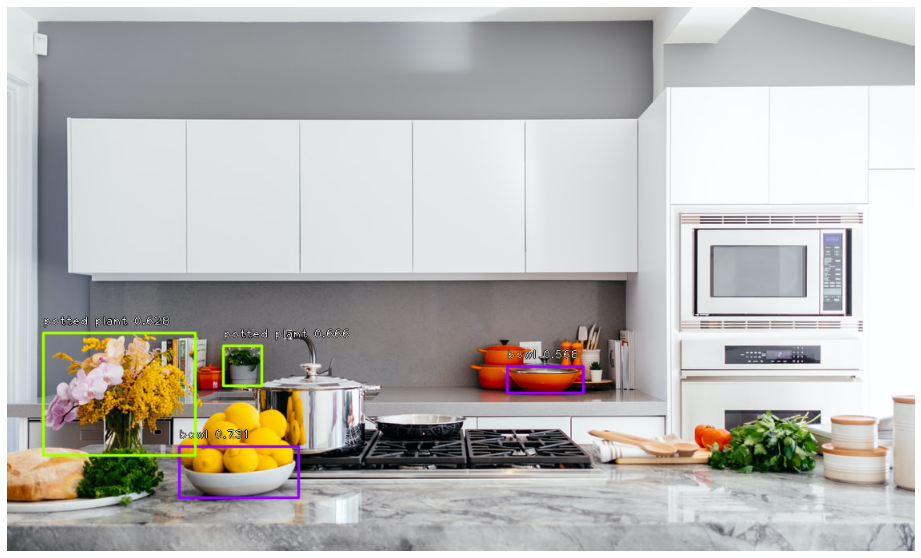

In [27]:
show_image_with_predictions('/content/drive/My Drive/Dataset/RetinaNet-Obj-Detection/test_image/kitchen.jpg', threshold=0.5)

im.shape: (333, 500, 3)


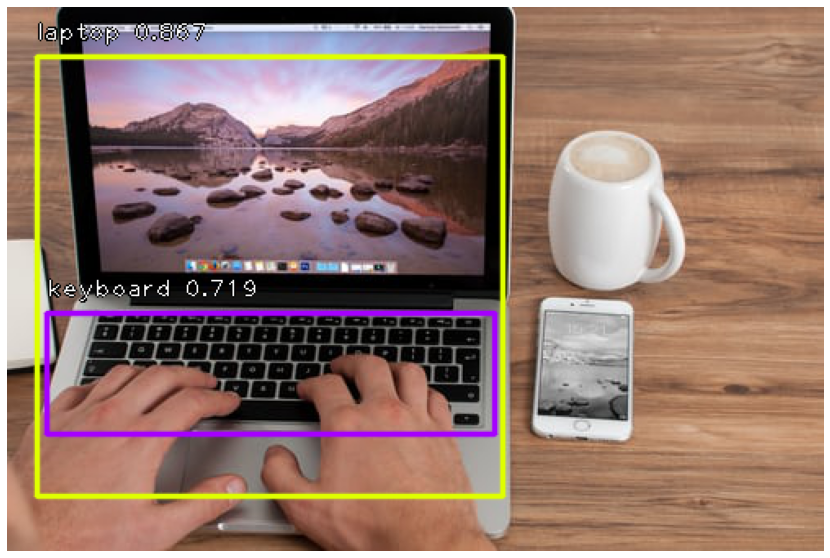

In [33]:
show_image_with_predictions('/content/drive/My Drive/Dataset/RetinaNet-Obj-Detection/test_image/laptop_keyboard.jpg',threshold=0.6)

im.shape: (700, 1050, 3)


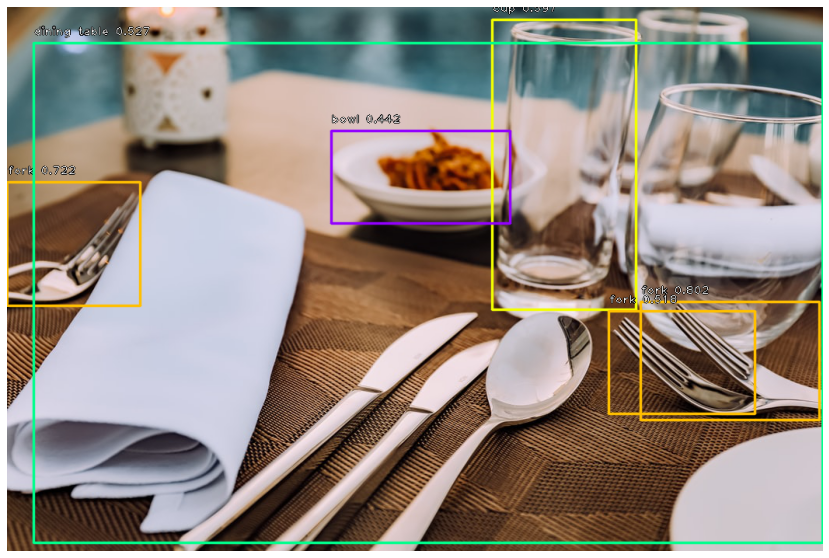

In [30]:
show_image_with_predictions('/content/drive/My Drive/Dataset/RetinaNet-Obj-Detection/test_image/fork_knofe_spoon.jpg',threshold=0.41)

im.shape: (700, 1050, 3)


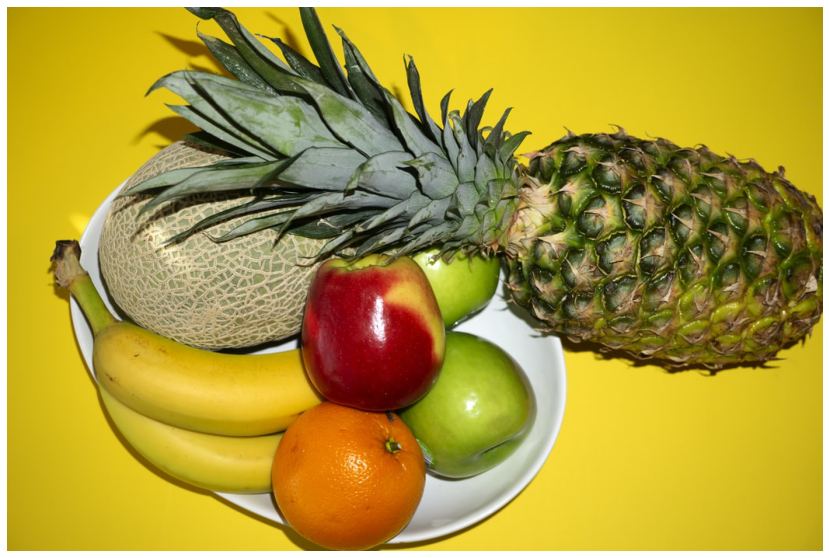

In [35]:
show_image_with_predictions('/content/drive/My Drive/Dataset/RetinaNet-Obj-Detection/test_image/Fruits_2.jpg',threshold=0.6)